# **Les Modules**

*   pandas : traiter des données,
*   re : manipuler des chaînes,
*   numpy : effectuer des calculs numériques,
*   matplotlib, seaborn et plotly.express : visualiser des données









In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Importer le Dataset de Avito Cars**

In [ ]:
car = pd.read_excel("/content/AvitoCars.xlsx")


**Afficher les 5 Premieres Lignes**

In [ ]:
car.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,Dacia Lodgy Diesel Manuelle 2019 Ã Casablanca,https://www.avito.ma/fr/ben_m'sick/voitures_d'...,"Voitures d'occasion, Ã vendre",Ben M'sick,5.00,WW au Maroc,Dacia,80 000 - 84 999,2019.00,Oui,Lodgy,TrÃ¨s bon,Diesel,6 CV,Manuelle,"133,000 DH"
1,Mercedes-Benz Classe A Diesel Automatique 2021,https://www.avito.ma/fr/m'hamid/voitures_d'occ...,"Voitures d'occasion, Ã vendre",M'Hamid,5.00,WW au Maroc,Mercedes-Benz,120 000 - 129 999,2021.00,Non,Classe A,Excellent,Diesel,8 CV,Automatique,"360,000 DH"
2,Classe A200 AMG M12/2019 DIWANA 2024,https://www.avito.ma/fr/settat/voitures_d'occa...,"Voitures d'occasion, Ã vendre",Toute la ville,5.00,DÃ©douanÃ©e,Mercedes-Benz,150 000 - 159 999,2019.00,Oui,Classe A,Excellent,Diesel,6 CV,Automatique,"390,000 DH"
3,Volkswagen ARTEO automatique,https://www.avito.ma/fr/ain_amiyer/voitures_d'...,"Voitures d'occasion, Ã vendre",Ain Amiyer,5.00,WW au Maroc,Volkswagen,100 000 - 109 999,2018.00,Oui,Arteon,Excellent,Diesel,8 CV,Automatique,Prix non spÃ©cifiÃ©
4,Peugeot 2008 Diesel Manuelle 2022 Ã Casablanca,https://www.avito.ma/fr/lissasfa/voitures_d'oc...,"Voitures d'occasion, Ã vendre",Lissasfa,NaN,NaN,Peugeot,20 000 - 24 999,2022.00,NaN,2008,Excellent,Diesel,6 CV,Manuelle,"235,000 DH"


**Afficher le Nombre de Ligne et de Colonnes**



*   82 652 Voitures
*   16 Caracteristiques



In [ ]:
car.shape

(82652, 16)

**Initialiser les Noms des Colonnes**


*   Nom : Le nom du véhicule.
*   Lien : Lien vers l'annonce du véhicule.
*   Type : Type de voitures (Occasion || A vendre).
*   Secteur : Secteur géographique de l'annonce.
*   Nombre de portes : Nombre de portes du véhicule.
*   Origine : Origine du véhicule.
*   Marque : Marque du véhicule.
*   Kilométrage : Distance parcourue par le véhicule.
*   Année-Modèle : Année de production du véhicule.
*   Première main : Indique si le véhicule est de première main.
*   Modèle : Modèle spécifique du véhicule.
*   État : État du véhicule (neuf, occasion).
*   Type de carburant : Type de carburant utilisé par le véhicule (ex. essence, diesel).
*   Puissance fiscale : Puissance fiscale du véhicule.
*   Boite de vitesses : Type de transmission (ex. manuelle, automatique).
*   Prix : Prix du véhicule.

In [ ]:
car.columns = ['Nom', 'Lien', 'Type', 'Secteur', 'Nombre de portes', 'Origine', 'Marque', 'Kilométrage','Année-Modèle', 'Première main', 'Modèle', 'État', 'Type de carburant', 'Puissance fiscale','Boite de vitesses','Prix']

In [ ]:
car.head()

,Nom,Lien,Type,Secteur,Nombre de portes,Origine,Marque,Kilométrage,Année-Modèle,Première main,Modèle,État,Type de carburant,Puissance fiscale,Boite de vitesses,Prix
0,Dacia Lodgy Diesel Manuelle 2019 Ã Casablanca,https://www.avito.ma/fr/ben_m'sick/voitures_d'...,"Voitures d'occasion, Ã vendre",Ben M'sick,5.00,WW au Maroc,Dacia,80 000 - 84 999,2019.00,Oui,Lodgy,TrÃ¨s bon,Diesel,6 CV,Manuelle,"133,000 DH"
1,Mercedes-Benz Classe A Diesel Automatique 2021,https://www.avito.ma/fr/m'hamid/voitures_d'occ...,"Voitures d'occasion, Ã vendre",M'Hamid,5.00,WW au Maroc,Mercedes-Benz,120 000 - 129 999,2021.00,Non,Classe A,Excellent,Diesel,8 CV,Automatique,"360,000 DH"
2,Classe A200 AMG M12/2019 DIWANA 2024,https://www.avito.ma/fr/settat/voitures_d'occa...,"Voitures d'occasion, Ã vendre",Toute la ville,5.00,DÃ©douanÃ©e,Mercedes-Benz,150 000 - 159 999,2019.00,Oui,Classe A,Excellent,Diesel,6 CV,Automatique,"390,000 DH"
3,Volkswagen ARTEO automatique,https://www.avito.ma/fr/ain_amiyer/voitures_d'...,"Voitures d'occasion, Ã vendre",Ain Amiyer,5.00,WW au Maroc,Volkswagen,100 000 - 109 999,2018.00,Oui,Arteon,Excellent,Diesel,8 CV,Automatique,Prix non spÃ©cifiÃ©
4,Peugeot 2008 Diesel Manuelle 2022 Ã Casablanca,https://www.avito.ma/fr/lissasfa/voitures_d'oc...,"Voitures d'occasion, Ã vendre",Lissasfa,NaN,NaN,Peugeot,20 000 - 24 999,2022.00,NaN,2008,Excellent,Diesel,6 CV,Manuelle,"235,000 DH"


Afficher un résumé concis du DataFrame 'car', montrant le type de données de chaque colonne, le nombre total de valeurs non nulles, ainsi que la consommation de mémoire.

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82652 entries, 0 to 82651
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nom                82652 non-null  object 
 1   Lien               82652 non-null  object 
 2   Type               82598 non-null  object 
 3   Secteur            72474 non-null  object 
 4   Nombre de portes   72105 non-null  float64
 5   Origine            70544 non-null  object 
 6   Marque             82589 non-null  object 
 7   Kilométrage        82589 non-null  object 
 8   Année-Modèle       82325 non-null  float64
 9   Première main      66230 non-null  object 
 10  Modèle             82589 non-null  object 
 11  État               77650 non-null  object 
 12  Type de carburant  82652 non-null  object 
 13  Puissance fiscale  80562 non-null  object 
 14  Boite de vitesses  80205 non-null  object 
 15  Prix               82652 non-null  object 
dtypes: float64(2), object(

# Analyse Exploratoire

**Afficher la somme des lignes dupliquées**

In [ ]:
car.duplicated().sum()

3132

**Supprimer les lignes dupliquées de notre DataFrame**

In [ ]:
car.drop_duplicates(inplace=True)

**Verifier le nombre de voitures non dupliquées**



*   79 520 Voitures
*   16 Caracteristiques



In [ ]:
car.shape

(79520, 16)

**Visualisé les valeurs uniques**

In [ ]:
car['Nombre de portes'].unique()

array([ 5., nan,  3.])

In [ ]:
car['Origine'].unique()

array(['WW au Maroc', 'DÃ©douanÃ©e', nan, 'ImportÃ©e neuve',
       'Pas encore dÃ©douanÃ©e'], dtype=object)

In [ ]:
car['Type'].unique()

array(["Voitures d'occasion, Ã\xa0 vendre", nan], dtype=object)

In [ ]:
car['Secteur'].unique()

array(["Ben M'sick", "M'Hamid", 'Toute la ville', 'Ain Amiyer',
       'Lissasfa', 'Autre secteur', 'Hassan', 'Hay el Fath', 'Agdal',
       'Al Qods', 'Ain Sebaa', 'AÃ¯n Chock', 'Oulfa', 'Hay Hassani',
       'Californie', '2 Mars', 'Massira 1', 'Hassania 2', 'Maarif',
       'Hay Riad', 'Centre ville', 'El Houda', 'Corniche', 'Hay Sadri',
       'Sidi Maarouf', 'Bourgogne', 'Touilaa', 'Al Azhar',
       'Hay Mohammadi', 'El Matar', 'Ahlane', 'Targa', 'Sidi Bernoussi',
       'Laimoune', 'Hay Al Kamal', 'Al Hadiqa', 'Bournazil', 'Hamria',
       'Al Irfane', 'Centre Ville', 'Massira', 'Narjis', 'AÃ¯n Borja',
       'Anfa', 'Safir', 'Hay Izdihar', 'Sidi Ghanem', 'Amerchich',
       'Hay Zaytoun', 'Touabel', 'Route Ain Chkaf', 'Extension Dakhla',
       'Maamora', "Route d'Immouzere", 'Sala El Jadida', 'Souissi',
       'Tabriquet', 'Ville verte', 'MÃ¨dina', 'Almaz', 'Bettana',
       'Wilaya', 'Quartier des HÃ´pitaux', 'AÃ¯n Diab', 'Massira 3',
       'Ahbas', 'SmaÃ¢la', 'Abdelmoumen',

In [ ]:
car['Nom'].unique()

array(['Dacia Lodgy Diesel Manuelle 2019 Ã\xa0 Casablanca',
       'Mercedes-Benz Classe A Diesel Automatique 2021',
       'Classe A200 AMG M12/2019 DIWANA 2024 ', ...,
       'Passat Cc Volkswagen 2.0 BVA', 'ford focus Titanium ',
       'Peugeot 407 1.6'], dtype=object)

In [ ]:
car['Marque'].unique()

array(['Dacia', 'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'Opel',
       'Renault', 'Audi', 'Seat', 'Porsche', 'Land Rover', 'Jeep', 'Fiat',
       'Mitsubishi', 'BMW', 'Skoda', 'Hyundai', 'Honda', 'Kia', 'Citroen',
       'Ford', '73', 'mini', 'Alfa Romeo', 'Toyota', 'Chevrolet',
       'Jaguar', 'Smart', '97', 'Volvo', 'Nissan', 'Bentley', 'Suzuki',
       'Maserati', 'Foton', 'Ssangyong', 'Cupra', 'Tesla', 'DS', 'Dodge',
       'DFSK', 'Daihatsu', 'Ferrari', 'Mazda', 'Lexus', 'Cadillac',
       'Lamborghini', 'Chery', nan, 'Hummer', 'Infiniti', '75', 'Rover',
       'Isuzu', 'Iveco', 'Mahindra', 'Aston Martin', 'lancia', 'GMC',
       '77', 'Autres', 'Rolls-Royce', 'Daewoo', 'Geely', 'Changhe',
       'Force', 'Chrysler', '74', '72', 'Subaru', 'BYD', '76', 'AC',
       'Pontiac', 'Zotye', 'Acrea', 'Masey Ferguson', 'Lincoln', 'UFO',
       'Man', 'Acura'], dtype=object)

In [ ]:
car['Kilométrage'].unique()

array(['80 000 - 84 999', '120 000 - 129 999', '150 000 - 159 999',
       '100 000 - 109 999', '20 000 - 24 999', '45 000 - 49 999',
       '85 000 - 89 999', '90 000 - 94 999', '5 000 - 9 999',
       '110 000 - 119 999', '160 000 - 169 999', '200 000 - 249 999',
       '40 000 - 44 999', '50 000 - 54 999', '170 000 - 179 999',
       '140 000 - 149 999', '130 000 - 139 999', '55 000 - 59 999',
       '60 000 - 64 999', '190 000 - 199 999', '180 000 - 189 999',
       '300 000 - 349 999', '250 000 - 299 999', '65 000 - 69 999',
       '95 000 - 99 999', '10 000 - 14 999', '35 000 - 39 999',
       '30 000 - 34 999', '70 000 - 74 999', '75 000 - 79 999',
       '0 - 4 999', '25 000 - 29 999', '15 000 - 19 999',
       '350 000 - 399 999', '450 000 - 499 999', '400 000 - 449 999',
       'Plus de 500 000', nan], dtype=object)

In [ ]:
car['Année-Modèle'].unique()

array([2019., 2021., 2018., 2022., 2013., 2020., 2023., 2016., 2017.,
       1999., 2005., 2015., 2006., 2014., 2011., 2008., 2009., 2012.,
       2010., 2004., 2024., 1997., 2002., 2007., 2003., 1986., 1989.,
       1991., 1993., 1992., 2000.,   nan, 1994., 1998., 1990., 1985.,
       2001., 1996., 1995., 1983., 1982., 1988., 1981., 1987., 1984.])

In [ ]:
car['Première main'].unique()

array(['Oui', 'Non', nan], dtype=object)

In [ ]:
car['Modèle'].unique()

array(['Lodgy', 'Classe A', 'Arteon', ..., 'Megane Cabriolet', 'Tahoe',
       'RDX'], dtype=object)

In [ ]:
car['État'].unique()

array(['TrÃ¨s bon', 'Excellent', 'Neuf', 'Bon', nan, 'Correct',
       'EndommagÃ©', 'Pour PiÃ¨ces'], dtype=object)

In [ ]:
car['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Electrique', 'LPG'], dtype=object)

In [ ]:
car['Puissance fiscale'].unique()

array(['6 CV', '8 CV', '12 CV', '9 CV', '10 CV', '7 CV', '11 CV', '17 CV',
       '5 CV', '35 CV', '23 CV', '22 CV', 'Plus de 41 CV', '34 CV',
       '31 CV', '14 CV', '28 CV', '16 CV', '29 CV', '18 CV', '4 CV',
       '15 CV', '13 CV', '27 CV', nan, '21 CV', '26 CV', '24 CV', '20 CV',
       '19 CV', '38 CV', '25 CV', '33 CV', '41 CV', '32 CV', '37 CV',
       '36 CV', '40 CV', '30 CV', '39 CV'], dtype=object)

In [ ]:
car['Boite de vitesses'].unique()

array(['Manuelle', 'Automatique', nan], dtype=object)

In [ ]:
car['Prix'].unique()

array(['133,000 DH', '360,000 DH', '390,000 DH', ..., '269,500 DH',
       '8,900,000 DH', '1,080,000 DH'], dtype=object)

In [ ]:
car["Lien"].unique()

array(["https://www.avito.ma/fr/ben_m'sick/voitures_d'occasion/Dacia_Lodgy_Diesel_Manuelle_2019_Ã\xa0_Casablanca_54760103.htm",
       "https://www.avito.ma/fr/m'hamid/voitures_d'occasion/Mercedes_Benz_Classe_A_Diesel_Automatique_2021_54591723.htm",
       "https://www.avito.ma/fr/settat/voitures_d'occasion/Classe_A200_AMG_M12_2019_DIWANA_2024__54699136.htm",
       ...,
       "https://www.avito.ma/fr/belvÃ©dÃ¨re/voitures_d'occasion/Passat_Cc_Volkswagen_2_0_BVA_45830768.htm",
       "https://www.avito.ma/fr/belvÃ©dÃ¨re/voitures_d'occasion/ford_focus_Titanium__45569972.htm",
       "https://www.avito.ma/fr/ksar_el_kebir/voitures_d'occasion/Peugeot_407_1_6_0.htm"],
      dtype=object)

**Visualiser la Somme des Valeurs Null Par Colonne**

In [ ]:
car.isnull().sum()

Nom                      0
Lien                     0
Type                    54
Secteur              10119
Nombre de portes     10090
Origine              11682
Marque                  63
Kilométrage             63
Année-Modèle           322
Première main        15879
Modèle                  63
État                  4735
Type de carburant        0
Puissance fiscale     2071
Boite de vitesses     2295
Prix                     0
dtype: int64

**Supprimer les Colonnes ( Type , Lien , Nom )**

In [ ]:
car.drop('Type', axis=1, inplace=True)

In [ ]:
car.drop('Lien', axis=1, inplace=True)

In [ ]:
car.drop('Nom', axis=1, inplace=True)

In [ ]:
car.shape

(79520, 13)

In [ ]:
car.isnull().sum()

Secteur              10119
Nombre de portes     10090
Origine              11682
Marque                  63
Kilométrage             63
Année-Modèle           322
Première main        15879
Modèle                  63
État                  4735
Type de carburant        0
Puissance fiscale     2071
Boite de vitesses     2295
Prix                     0
dtype: int64

**Supprimer les valeurs incompréhensible de la colonne 'Marque'**

In [ ]:
car = car[~car['Marque'].isin(['73', '97', '75', '77','Autres','74','72','76','Masey Ferguson','UFO'])]

In [ ]:
car['Marque'].unique()

array(['Dacia', 'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'Opel',
       'Renault', 'Audi', 'Seat', 'Porsche', 'Land Rover', 'Jeep', 'Fiat',
       'Mitsubishi', 'BMW', 'Skoda', 'Hyundai', 'Honda', 'Kia', 'Citroen',
       'Ford', 'mini', 'Alfa Romeo', 'Toyota', 'Chevrolet', 'Jaguar',
       'Smart', 'Volvo', 'Nissan', 'Bentley', 'Suzuki', 'Maserati',
       'Foton', 'Ssangyong', 'Cupra', 'Tesla', 'DS', 'Dodge', 'DFSK',
       'Daihatsu', 'Ferrari', 'Mazda', 'Lexus', 'Cadillac', 'Lamborghini',
       'Chery', nan, 'Hummer', 'Infiniti', 'Rover', 'Isuzu', 'Iveco',
       'Mahindra', 'Aston Martin', 'lancia', 'GMC', 'Rolls-Royce',
       'Daewoo', 'Geely', 'Changhe', 'Force', 'Chrysler', 'Subaru', 'BYD',
       'AC', 'Pontiac', 'Zotye', 'Acrea', 'Lincoln', 'Man', 'Acura'],
      dtype=object)

In [ ]:
car.shape

(78940, 13)

**Supprimer les Colonnes Nombre de Portes et Secteurs**

In [ ]:
car['Secteur'].unique()

array(["Ben M'sick", "M'Hamid", 'Toute la ville', 'Ain Amiyer',
       'Lissasfa', 'Autre secteur', 'Hassan', 'Hay el Fath', 'Agdal',
       'Al Qods', 'Ain Sebaa', 'AÃ¯n Chock', 'Oulfa', 'Hay Hassani',
       'Californie', '2 Mars', 'Massira 1', 'Hassania 2', 'Maarif',
       'Hay Riad', 'Centre ville', 'El Houda', 'Corniche', 'Hay Sadri',
       'Sidi Maarouf', 'Bourgogne', 'Touilaa', 'Al Azhar',
       'Hay Mohammadi', 'El Matar', 'Ahlane', 'Targa', 'Sidi Bernoussi',
       'Laimoune', 'Hay Al Kamal', 'Al Hadiqa', 'Bournazil', 'Hamria',
       'Al Irfane', 'Centre Ville', 'Massira', 'Narjis', 'AÃ¯n Borja',
       'Anfa', 'Safir', 'Hay Izdihar', 'Sidi Ghanem', 'Amerchich',
       'Hay Zaytoun', 'Touabel', 'Route Ain Chkaf', 'Extension Dakhla',
       'Maamora', "Route d'Immouzere", 'Sala El Jadida', 'Souissi',
       'Tabriquet', 'Ville verte', 'MÃ¨dina', 'Almaz', 'Bettana',
       'Wilaya', 'Quartier des HÃ´pitaux', 'AÃ¯n Diab', 'Massira 3',
       'Ahbas', 'SmaÃ¢la', 'Abdelmoumen',

In [ ]:
car.drop('Secteur', axis=1, inplace=True)

<ipython-input-196-ad0a4b2e6490>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
car.drop('Nombre de portes', axis=1, inplace=True)

<ipython-input-197-922348b193f2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
car.isnull().sum()

Origine              11562
Marque                  63
Kilométrage             63
Année-Modèle           305
Première main        15750
Modèle                  63
État                  4700
Type de carburant        0
Puissance fiscale     2048
Boite de vitesses     2270
Prix                     0
dtype: int64

In [ ]:
car.shape

(78940, 11)

**Supprimer les valeurs nulls des 4 colonnes**

In [ ]:
car.dropna(subset=['Marque'], inplace=True)

In [ ]:
car.dropna(subset=['Année-Modèle'], inplace=True)

In [ ]:
car.isnull().sum()

Origine              11437
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        15610
Modèle                   0
État                  4607
Type de carburant        0
Puissance fiscale     2026
Boite de vitesses     2249
Prix                     0
dtype: int64

**Corriger les Valeurs des colonnes**  
*   Origine
*   Etats
*   Puissance Fiscale
*   Prix
*   Kilométrage








In [ ]:
car['Origine'] = car['Origine'].replace({
    'DÃ©douanÃ©e': 'Dédouanée',
    'ImportÃ©e neuve': 'Importée neuve',
    'Pas encore dÃ©douanÃ©e': 'Pas encore dédouanée'
})

In [ ]:
car['Origine'].unique()

array(['WW au Maroc', 'Dédouanée', nan, 'Importée neuve',
       'Pas encore dédouanée'], dtype=object)

In [ ]:
car["État"].replace({'TrÃ¨s bon': 'Très bon','EndommagÃ©': 'Endommagé','Pour PiÃ¨ces': 'Pour Pièces'},inplace=True)

In [ ]:
car["État"].unique()

array(['Très bon', 'Excellent', 'Neuf', 'Bon', nan, 'Correct',
       'Endommagé', 'Pour Pièces'], dtype=object)

In [ ]:
def convert_to_int(value):
    if pd.isna(value):
        return None
    try:
        value = str(value)
        numbers = re.findall(r'\d+', value)
        if numbers:
            return int(numbers[0])
        else:
            return None
    except ValueError:
        return None

car['Puissance fiscale'] = car['Puissance fiscale'].map(convert_to_int)


In [ ]:
car['Puissance fiscale'].unique()

array([ 6.,  8., 12.,  9., 10.,  7., 11., 17.,  5., 35., 23., 22., 41.,
       34., 31., 14., 28., 16., 29., 18.,  4., 15., 13., 27., nan, 21.,
       26., 24., 20., 19., 38., 25., 33., 32., 37., 36., 40., 30., 39.])

In [ ]:
car['Puissance fiscale'] = car['Puissance fiscale'].astype('Int64')
car['Puissance fiscale'].unique()

<IntegerArray>
[   6,    8,   12,    9,   10,    7,   11,   17,    5,   35,   23,   22,   41,
   34,   31,   14,   28,   16,   29,   18,    4,   15,   13,   27, <NA>,   21,
   26,   24,   20,   19,   38,   25,   33,   32,   37,   36,   40,   30,   39]
Length: 39, dtype: Int64

In [ ]:
car = car[car['Prix'] != 'Prix non spÃ©cifiÃ©']

In [ ]:
car.shape

(63341, 11)

In [ ]:
car['Prix'] = car['Prix'].astype(str)
car['Prix'] = car['Prix'].str.replace(' DH', '')
car['Prix'] = car['Prix'].str.replace(',', '')
car['Prix'] = pd.to_numeric(car['Prix'], errors='coerce')
car['Prix']

0        133000
1        360000
2        390000
4        235000
5        112000
          ...  
82646    140000
82647     90000
82648     50000
82649    220000
82650    128000
Name: Prix, Length: 63341, dtype: int64

In [ ]:
car['Prix'].unique()

array([ 133000,  360000,  390000, ...,  269500, 8900000, 1080000])

In [ ]:

def calculate_mean_np(km_range):
    if '-' in km_range:
        low, high = km_range.split('-')
        low = int(low.strip().replace(' ', '').replace(',', ''))
        high = int(high.strip().replace(' ', '').replace(',', ''))
        return (low + high) / 2
    else:
        value = str(km_range)
        numbers = re.findall(r'\d+', value)
        if numbers:
            return int(numbers[0])

In [ ]:
car['Kilométrage'] = car['Kilométrage'].apply(calculate_mean_np)
car['Kilométrage']

0        82499.50
1       124999.50
2       154999.50
4        22499.50
5       154999.50
           ...   
82646   224999.50
82647   164999.50
82648    12499.50
82649   114999.50
82650   224999.50
Name: Kilométrage, Length: 63341, dtype: float64

In [ ]:
car['Kilométrage']=car['Kilométrage'].round(0)
car['Kilométrage']

0        82500.00
1       125000.00
2       155000.00
4        22500.00
5       155000.00
           ...   
82646   225000.00
82647   165000.00
82648    12500.00
82649   115000.00
82650   225000.00
Name: Kilométrage, Length: 63341, dtype: float64

In [ ]:
car['Kilométrage']=car['Kilométrage'].astype('Int64')
car['Kilométrage']

0         82500
1        125000
2        155000
4         22500
5        155000
          ...  
82646    225000
82647    165000
82648     12500
82649    115000
82650    225000
Name: Kilométrage, Length: 63341, dtype: Int64

In [ ]:
car['Kilométrage'].unique()

<IntegerArray>
[ 82500, 125000, 155000,  22500,  47500,  42500,  52500, 145000, 105000,
  57500,  62500, 225000,  92500, 195000, 325000, 165000, 275000, 135000,
 175000,  67500,  97500, 115000,  32500,  72500,  77500,  27500,   7500,
  37500,   2500,  87500, 185000,  17500,  12500, 375000, 425000,    500,
 475000]
Length: 37, dtype: Int64

In [ ]:
car.isnull().sum()

Origine               8905
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        11983
Modèle                   0
État                  3396
Type de carburant        0
Puissance fiscale     1545
Boite de vitesses     1796
Prix                     0
dtype: int64

**Creation nouvelle colonne Age de Voiture**

In [ ]:
car['Année-Modèle'].unique()

array([2019., 2021., 2022., 2013., 2020., 2018., 2016., 2017., 2005.,
       2015., 2006., 2023., 2011., 1999., 2008., 2014., 2012., 2010.,
       2004., 2009., 2024., 1997., 2002., 2007., 2003., 1989., 1991.,
       1986., 1993., 2000., 1992., 1994., 1998., 1990., 1985., 2001.,
       1996., 1995., 1983., 1988., 1981., 1987., 1984., 1982.])

In [ ]:
car = car.assign(Age_de_voiture = 2024 - car['Année-Modèle'])

In [ ]:
car['Age_de_voiture'] = car['Age_de_voiture'].astype('Int64')
car['Age_de_voiture'].unique()

<IntegerArray>
[ 5,  3,  2, 11,  4,  6,  8,  7, 19,  9, 18,  1, 13, 25, 16, 10, 12, 14, 20,
 15,  0, 27, 22, 17, 21, 35, 33, 38, 31, 24, 32, 30, 26, 34, 39, 23, 28, 29,
 41, 36, 43, 37, 40, 42]
Length: 44, dtype: Int64

In [ ]:
car.isnull().sum()

Origine               8905
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        11983
Modèle                   0
État                  3396
Type de carburant        0
Puissance fiscale     1545
Boite de vitesses     1796
Prix                     0
Age_de_voiture           0
dtype: int64

In [ ]:
car.shape

(63341, 12)

**Description statistique du Prix**


*   Min : 1.00 = Le prix minimum est de 1, ce qui est clairement une anomalie.
*   Max : 1,600,000,000.00 = Le prix maximum est extrêmement élevé à 1,600,000,000, confirmant la présence de valeurs aberrantes.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
car["Prix"].describe()

count        63341.00
mean        520468.87
std       16750417.43
min              1.00
25%          53000.00
50%          90000.00
75%         147000.00
max     1600000000.00
Name: Prix, dtype: float64


**Suppression des Valeurs dans la Colonne "Prix" Excédant 3,000,000 ou Inférieures à 30,000**

In [ ]:
car.drop(car[car["Prix"] > 3000000].index, inplace=True)

In [ ]:
car.drop(car[car["Prix"] < 30000].index,inplace=True)

In [ ]:
car.shape

(58098, 12)

In [ ]:
car.isnull().sum()

Origine               7944
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10861
Modèle                   0
État                  2992
Type de carburant        0
Puissance fiscale     1389
Boite de vitesses     1601
Prix                     0
Age_de_voiture           0
dtype: int64

**Effacer les lignes qui ont des valeurs nulls dans plus de 5 Colonnes**

In [ ]:
car = car[car.isnull().sum(axis=1) < 5]

In [ ]:
car.shape

(57743, 12)

In [ ]:
car.isnull().sum()

Origine               7589
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10506
Modèle                   0
État                  2637
Type de carburant        0
Puissance fiscale     1034
Boite de vitesses     1246
Prix                     0
Age_de_voiture           0
dtype: int64

**Remplissage des Valeurs Manquantes dans la Colonne "Puissance fiscale" par la Médiane des Valeurs de Puissance Fiscale Groupées par Marque et Modèle**

In [ ]:
car['Puissance fiscale'] = car.groupby(['Marque', 'Modèle'])['Puissance fiscale'].transform(
    lambda x: x.fillna(value=round(x.median()) if not pd.isna(x.median()) else np.nan)
)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



In [ ]:
car.isnull().sum()

Origine               7589
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10506
Modèle                   0
État                  2637
Type de carburant        0
Puissance fiscale        1
Boite de vitesses     1246
Prix                     0
Age_de_voiture           0
dtype: int64

In [ ]:
null_counts = car.groupby(['Marque', 'Modèle'])['Puissance fiscale'].apply(lambda x: x.isna().sum())
null_counts_with_nulls = null_counts[null_counts > 0]
null_counts_with_nulls

Marque     Modèle 
Chevrolet  TRACKER    1
Name: Puissance fiscale, dtype: int64

In [ ]:
car.dropna(subset=['Puissance fiscale'], inplace=True)

In [ ]:
car.isnull().sum()

Origine               7588
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10506
Modèle                   0
État                  2637
Type de carburant        0
Puissance fiscale        0
Boite de vitesses     1245
Prix                     0
Age_de_voiture           0
dtype: int64

**Nombre de Boîtes de Vitesses Automatiques et Manuelles par Marque, Modèle et Année-Modèle**

In [ ]:
freq = car.groupby(['Marque', 'Modèle','Année-Modèle', 'Boite de vitesses']).size().unstack(fill_value=0)
freq

Boite de vitesses                Automatique  Manuelle
Marque     Modèle  Année-Modèle                       
AC         GT 40   2017.00                 0         1
Acrea      ZEST    2006.00                 0         1
                   2015.00                 0         1
Alfa Romeo 145     1981.00                 0         1
                   1999.00                 0         1
...                                      ...       ...
mini       one     2016.00                 1         1
                   2017.00                 1         0
                   2018.00                 0         1
           paceman 2014.00                 1         0
                   2015.00                 2         0

[6451 rows x 2 columns]


**Décision sur la Granularité d'Imputation de la Boîte de Vitesses en Fonction des Taux de Variation de Fréquence et de Proportion**

In [ ]:
prop = car.pivot_table(
    index=['Marque', 'Modèle', 'Année-Modèle'],
    columns='Boite de vitesses',
    aggfunc='size',
    fill_value=0
)

prop = prop.assign(Total=prop.sum(axis=1))
prop = prop.div(prop['Total'], axis=0)

prop

Boite de vitesses                Automatique  Manuelle  Total
Marque     Modèle  Année-Modèle                              
AC         GT 40   2017.00              0.00      1.00   1.00
Acrea      ZEST    2006.00              0.00      1.00   1.00
                   2015.00              0.00      1.00   1.00
Alfa Romeo 145     1981.00              0.00      1.00   1.00
                   1999.00              0.00      1.00   1.00
...                                      ...       ...    ...
mini       one     2016.00              0.50      0.50   1.00
                   2017.00              1.00      0.00   1.00
                   2018.00              0.00      1.00   1.00
           paceman 2014.00              1.00      0.00   1.00
                   2015.00              1.00      0.00   1.00

[6451 rows x 3 columns]

In [ ]:
# Calculer le taux de variation total de la fréquence
taux_variation_freq_total = (freq.sum(axis=0) - freq.sum(axis=0).shift(1)) / freq.sum(axis=0).shift(1)
taux_variation_freq_total = taux_variation_freq_total.fillna(0)

# Calculer le taux de variation total de la proportion
taux_variation_prop_total = (prop.sum(axis=0) - prop.sum(axis=0).shift(1)) / prop.sum(axis=0).shift(1)
taux_variation_prop_total = taux_variation_prop_total.fillna(0)

if taux_variation_freq_total.max() < 0.1 and taux_variation_prop_total.max() < 0.1:
    print("Année-Modèle et Marque et Modèle")
else:

    print("Marque et Modèle")

Marque et Modèle


 Le taux de variation total de la proportion de voitures à boîte de vitesses automatique est de 0,00 %, tandis que le taux de variation total de la proportion de voitures à boîte de vitesses manuelle est de 1,51 %.


En d'autres termes, la proportion de voitures à boîte de vitesses automatique n'a pas changé de manière significative, alors que la proportion de voitures à boîte de vitesses manuelle a augmenté de 1,51 %.
Cela signifie que de plus en plus de gens choisissent les voitures à boîte de vitesses manuelle, tandis que la popularité des voitures à boîte de vitesses automatique reste stable.

In [ ]:
taux_variation_freq_total

Boite de vitesses
Automatique   0.00
Manuelle      1.93
dtype: float64

In [ ]:
taux_variation_prop_total

Boite de vitesses
Automatique   0.00
Manuelle      1.31
Total         0.43
dtype: float64

**Imputation du mode pour les valeurs manquantes dans une colonne Boite a Vitesse**

In [ ]:

def mode_imputation(series):
    if series.mode().empty:
        return None
    else:
        return series.mode().iloc[0]


car['Boite de vitesses'] = car.groupby(['Marque', 'Modèle'])['Boite de vitesses'].transform(
    lambda x: x.fillna(mode_imputation(x) if mode_imputation(x) is not None else x)
)

In [ ]:
car.dropna(subset=["Boite de vitesses"],inplace=True)

In [ ]:
car.isnull().sum()

Origine               7587
Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10505
Modèle                   0
État                  2636
Type de carburant        0
Puissance fiscale        0
Boite de vitesses        0
Prix                     0
Age_de_voiture           0
dtype: int64

In [ ]:
car.shape

(57741, 12)

**Comprehensions de Ces Colonnes**

In [ ]:
car["Origine"].unique()

array(['WW au Maroc', 'Dédouanée', nan, 'Pas encore dédouanée',
       'Importée neuve'], dtype=object)

In [ ]:
car["État"].unique()

array(['Très bon', 'Excellent', 'Neuf', 'Bon', nan, 'Correct',
       'Endommagé', 'Pour Pièces'], dtype=object)

In [ ]:
car["Première main"].unique()

array(['Oui', 'Non', nan], dtype=object)

In [ ]:
car.drop("Origine",axis=1,inplace=True)

In [ ]:
car.isnull().sum()

Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10505
Modèle                   0
État                  2636
Type de carburant        0
Puissance fiscale        0
Boite de vitesses        0
Prix                     0
Age_de_voiture           0
dtype: int64

**Ce tableau croisé présente la fréquence des combinaisons de "Première main" et d'"État" dans le DataFrame "car".**

In [ ]:

combinations = pd.crosstab(car['Première main'], car['État'], dropna=False)
combinations


État,Bon,Correct,Endommagé,Excellent,Neuf,Pour Pièces,Très bon
Première main,,,,,,,
Non,5540,640,23,10562,758,14,13063
Oui,1161,123,7,8173,1189,4,5266


**Cette fonction map_etat mappe les états des voitures en trois catégories : "Bon", "Très bon" et "Mauvais".**

In [ ]:
def map_etat(etat):
    if etat in ['Bon', 'Correct']:
        return 'Bon'
    elif etat in ['Excellent', 'Neuf', 'Très bon']:
        return 'Très bon'
    elif etat in ['Endommagé', 'Pour Pièces']:
        return 'Mauvais'
    else:
        return etat

car['État'] = car['État'].map(map_etat)
car

,Marque,Kilométrage,Année-Modèle,Première main,Modèle,État,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture
0,Dacia,82500,2019.00,Oui,Lodgy,Très bon,Diesel,6,Manuelle,133000,5
1,Mercedes-Benz,125000,2021.00,Non,Classe A,Très bon,Diesel,8,Automatique,360000,3
2,Mercedes-Benz,155000,2019.00,Oui,Classe A,Très bon,Diesel,6,Automatique,390000,5
4,Peugeot,22500,2022.00,NaN,2008,Très bon,Diesel,6,Manuelle,235000,2
5,Opel,155000,2013.00,NaN,Astra,Très bon,Diesel,6,Manuelle,112000,11
...,...,...,...,...,...,...,...,...,...,...,...
82646,Volkswagen,225000,2013.00,Oui,Caddy,Très bon,Diesel,6,Manuelle,140000,11
82647,Kia,165000,2011.00,Oui,Carens,Bon,Diesel,8,Manuelle,90000,13
82648,Mercedes-Benz,12500,2001.00,Non,220,NaN,Diesel,9,Automatique,50000,23
82649,Volkswagen,115000,2016.00,Oui,CC,Très bon,Diesel,8,Automatique,220000,8


In [ ]:
combinations = pd.crosstab(car['Première main'], car['État'], dropna=False)
combinations

État,Bon,Mauvais,Très bon
Première main,,,
Non,6180,37,24383
Oui,1284,11,14628


In [ ]:
car.isnull().sum()


Marque                   0
Kilométrage              0
Année-Modèle             0
Première main        10505
Modèle                   0
État                  2636
Type de carburant        0
Puissance fiscale        0
Boite de vitesses        0
Prix                     0
Age_de_voiture           0
dtype: int64

In [ ]:
car.drop("État",axis=1,inplace=True)

In [ ]:
car.drop("Première main",axis=1,inplace=True)

In [ ]:
car.isnull().sum()

Marque               0
Kilométrage          0
Année-Modèle         0
Modèle               0
Type de carburant    0
Puissance fiscale    0
Boite de vitesses    0
Prix                 0
Age_de_voiture       0
dtype: int64

In [ ]:
car.shape

(57741, 9)

# Data Visualisation

***Nombre de Voitures par Marque***

Le graphique montre une répartition claire du nombre de voitures listées par marque. Les marques comme Renault, Volkswagen et Peugeot dominent clairement en termes de nombre de véhicules disponibles, indiquant une forte préférence ou une grande disponibilité de ces marques sur le marché concerné.




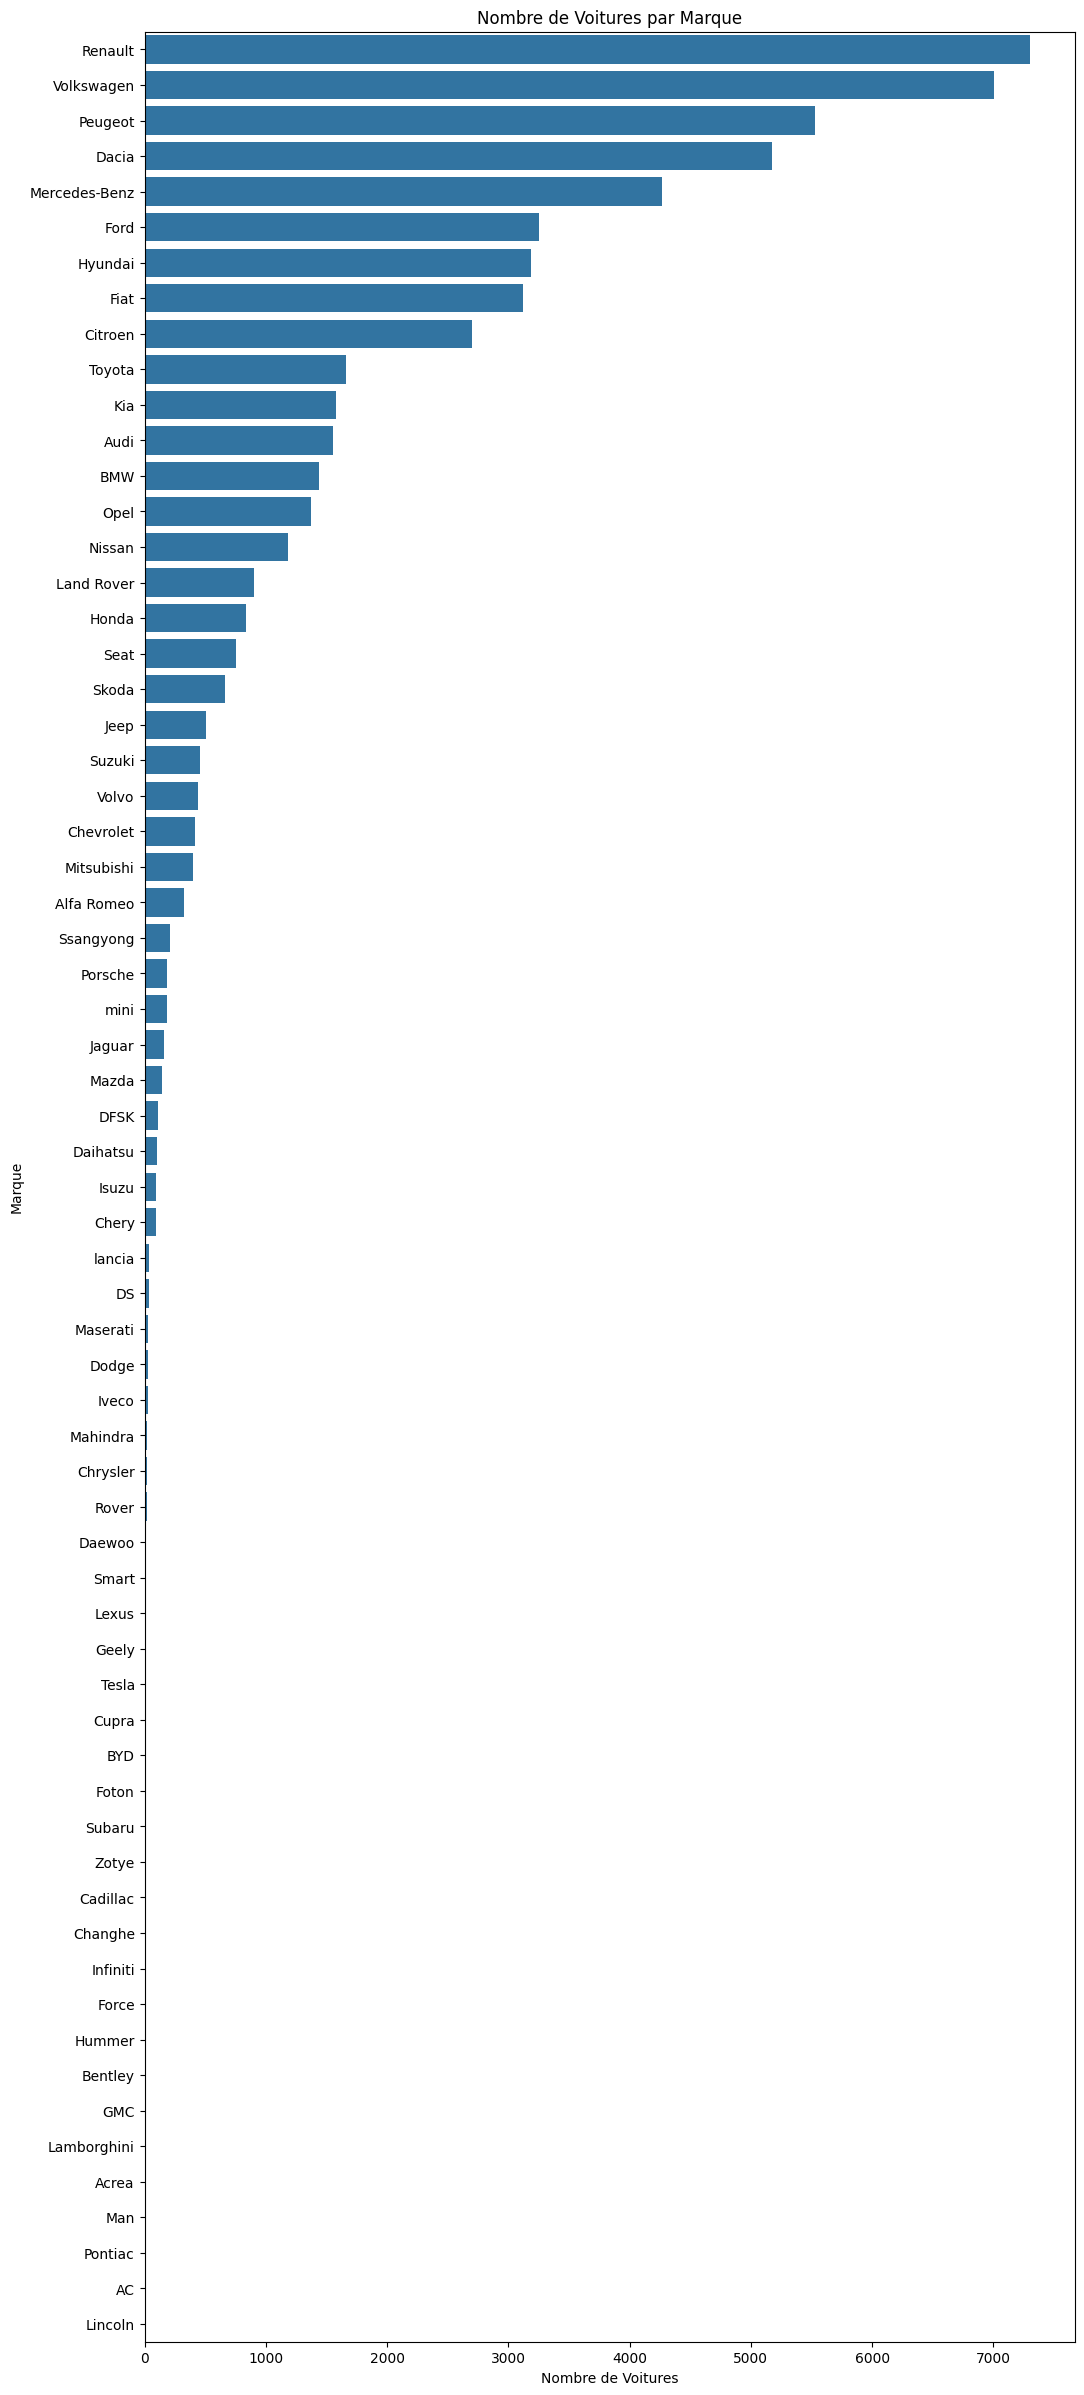

In [ ]:
plt.figure(figsize=(12, 30))
sns.countplot(y='Marque', data=car, order = car['Marque'].value_counts().index)
plt.title('Nombre de Voitures par Marque')
plt.xlabel('Nombre de Voitures')
plt.ylabel('Marque')
plt.show()



In [ ]:
counts = car['Marque'].value_counts()
popular_marques = counts[counts >= 906].index
car = car[car['Marque'].isin(popular_marques)]
car

,Marque,Kilométrage,Année-Modèle,Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture
0,Dacia,82500,2019.00,Lodgy,Diesel,6,Manuelle,133000,5
1,Mercedes-Benz,125000,2021.00,Classe A,Diesel,8,Automatique,360000,3
2,Mercedes-Benz,155000,2019.00,Classe A,Diesel,6,Automatique,390000,5
4,Peugeot,22500,2022.00,2008,Diesel,6,Manuelle,235000,2
5,Opel,155000,2013.00,Astra,Diesel,6,Manuelle,112000,11
...,...,...,...,...,...,...,...,...,...
82646,Volkswagen,225000,2013.00,Caddy,Diesel,6,Manuelle,140000,11
82647,Kia,165000,2011.00,Carens,Diesel,8,Manuelle,90000,13
82648,Mercedes-Benz,12500,2001.00,220,Diesel,9,Automatique,50000,23
82649,Volkswagen,115000,2016.00,CC,Diesel,8,Automatique,220000,8


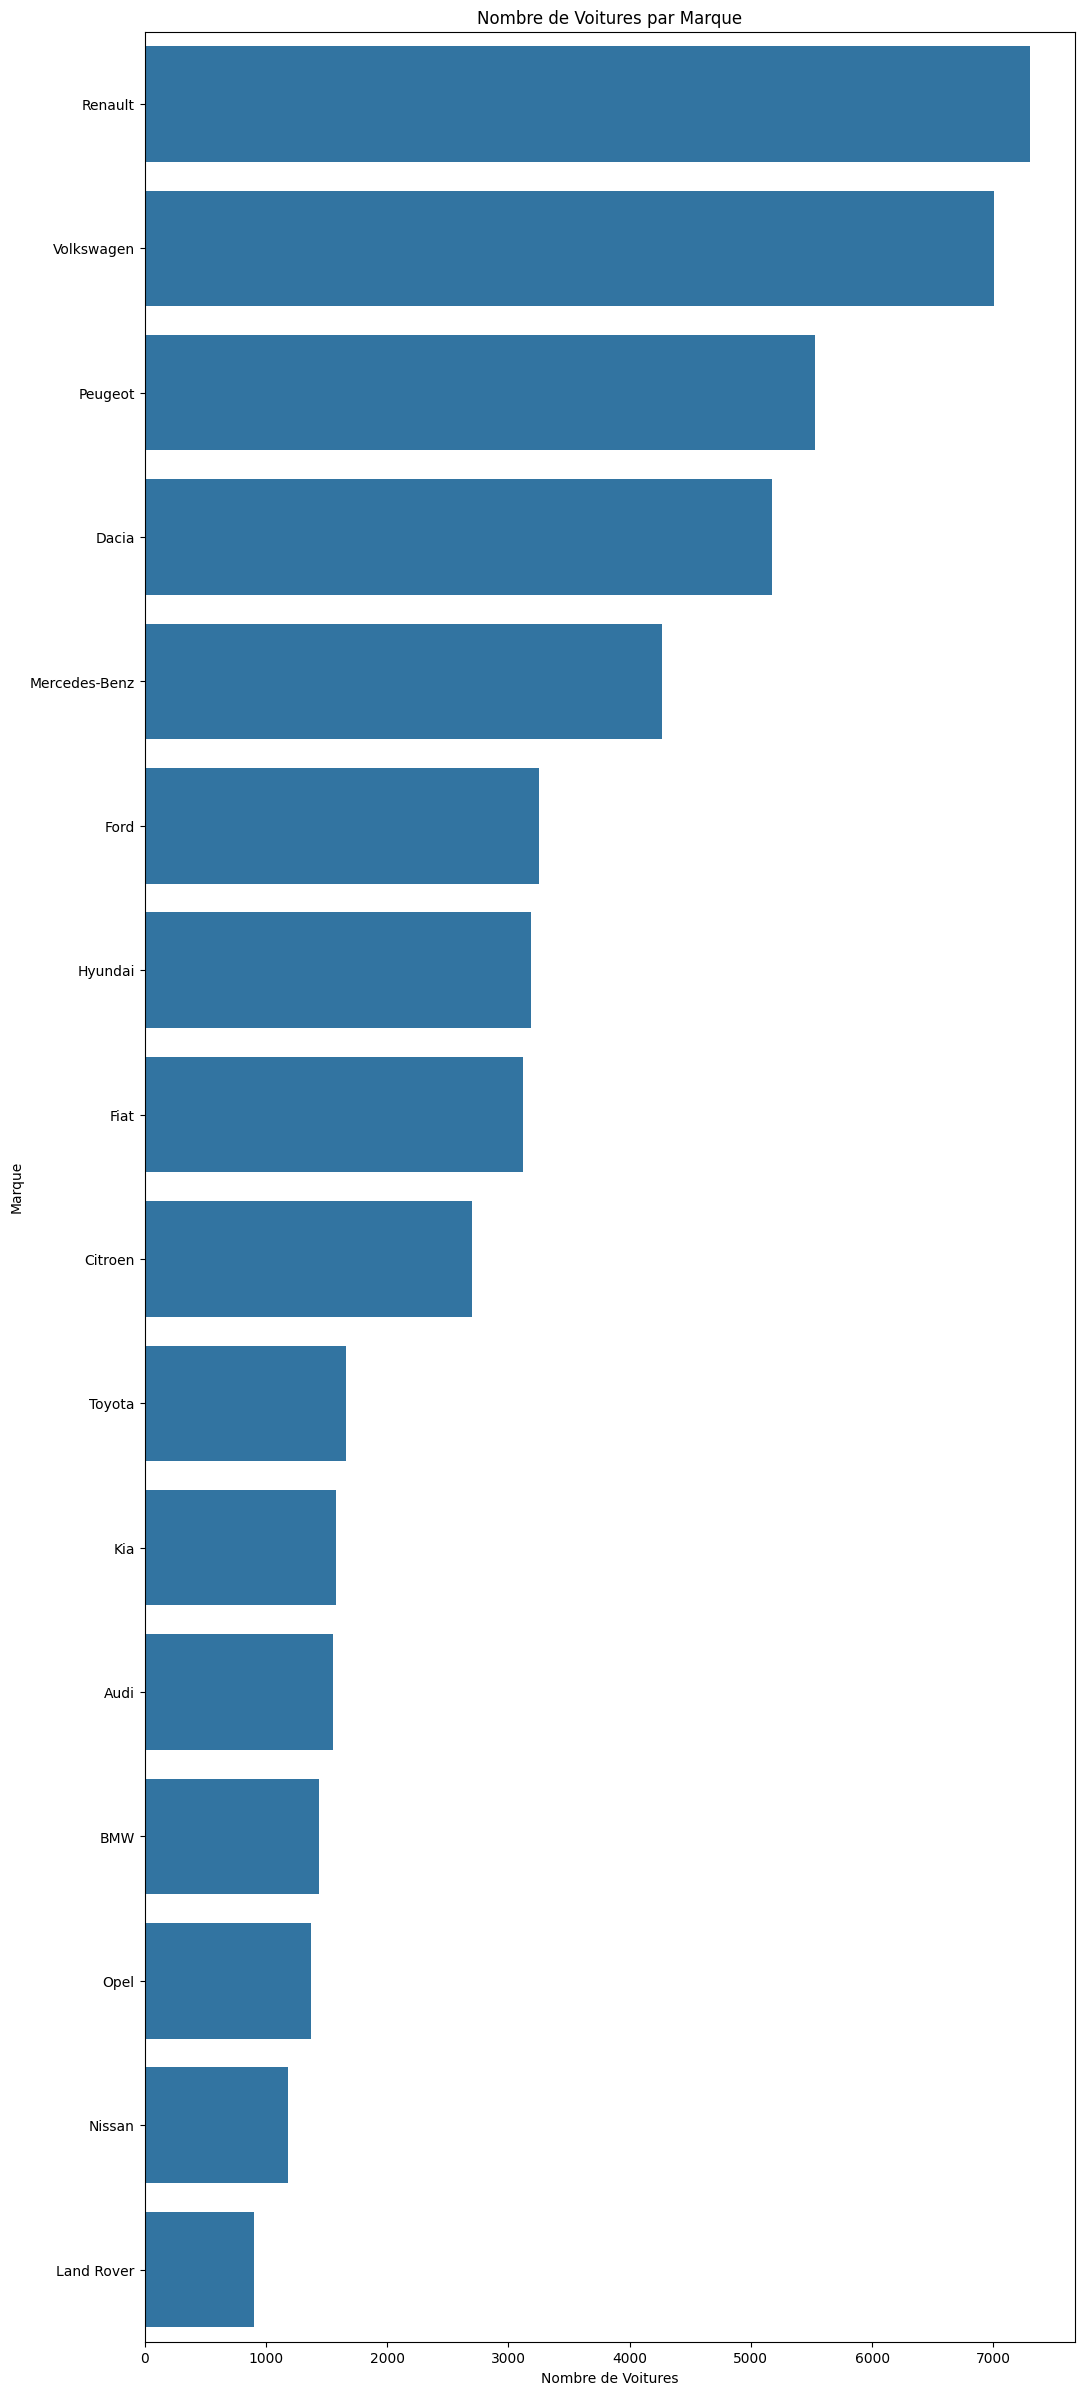

In [ ]:
plt.figure(figsize=(12, 30))
sns.countplot(y='Marque', data=car, order = car['Marque'].value_counts().index)
plt.title('Nombre de Voitures par Marque')
plt.xlabel('Nombre de Voitures')
plt.ylabel('Marque')
plt.show()

In [ ]:
car.shape

(51236, 9)

**Les Marques de Voitures et Leurs Modeles**

In [ ]:
car['Count'] = 1
df_count = car.groupby(['Marque', 'Modèle']).count().reset_index()
fig = px.treemap(df_count, path=['Marque', 'Modèle'], values='Count',
                 title='Répartition des Voitures par Marque et Modèle')
fig.show()


<ipython-input-264-6e9a751fdbad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model_counts = car.groupby(['Marque', 'Modèle']).size()
less_than_200 = model_counts[model_counts < 200].index
car = car[~car.set_index(['Marque', 'Modèle']).index.isin(less_than_200)]

In [ ]:
car.head()

,Marque,Kilométrage,Année-Modèle,Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture,Count
1,Mercedes-Benz,125000,2021.00,Classe A,Diesel,8,Automatique,360000,3,1
2,Mercedes-Benz,155000,2019.00,Classe A,Diesel,6,Automatique,390000,5,1
5,Opel,155000,2013.00,Astra,Diesel,6,Manuelle,112000,11,1
7,Audi,47500,2020.00,A3,Diesel,8,Automatique,275000,4,1
18,Volkswagen,52500,2018.00,Tiguan,Hybride,8,Automatique,250000,6,1


In [ ]:
car['Count'] = 1
df_count = car.groupby(['Marque', 'Modèle']).count().reset_index()
fig = px.treemap(df_count, path=['Marque', 'Modèle'], values='Count',
                 title='Répartition des Voitures par Marque et Modèle')
fig.show()


<ipython-input-267-6e9a751fdbad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Les Marques selon les Prix**

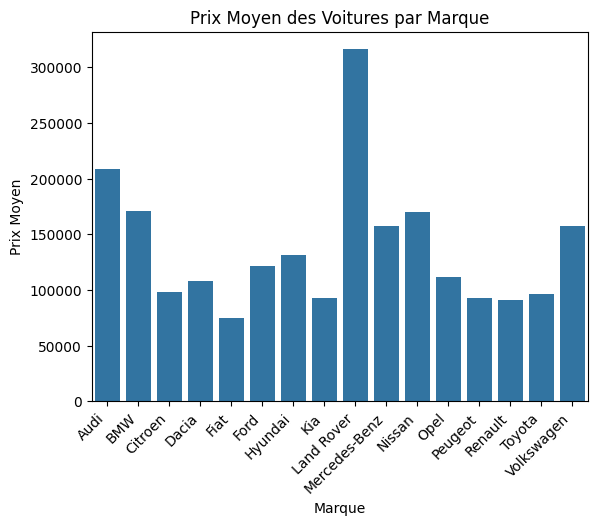

In [ ]:
mean_prices = car.groupby('Marque')['Prix'].mean()

sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.xlabel("Marque")
plt.ylabel("Prix Moyen")
plt.xticks(rotation=45, ha="right")
plt.title("Prix Moyen des Voitures par Marque")
plt.show()

**Marques de luxe :** Mercedes-Benz, BMW, Audi et Land Rover ont des prix significativement plus élevés que les autres marques, avec une plus grande variabilité de prix en raison de la diversité de leurs modèles.

**Marques économiques :** Dacia, Kia, Hyundai, Fiat et Nissan offrent des prix généralement plus abordables avec une gamme de prix plus étroite.

**Marques intermédiaires :** Volkswagen, Renault, Peugeot, Citroën, Ford, Opel et Toyota occupent une position intermédiaire avec une gamme de prix plus large et un certain chevauchement entre elles.

**Variabilité des prix :** La longueur des boîtes à moustaches indique la variabilité des prix au sein de chaque marque, reflétant la diversité de leurs modèles et les options d'entrée de gamme ou haut de gamme.

**Valeurs aberrantes :** Des points en dehors des moustaches représentent des voitures avec des prix exceptionnellement élevés ou bas pour leur marque, potentiellement des modèles rares ou des éditions spéciales.

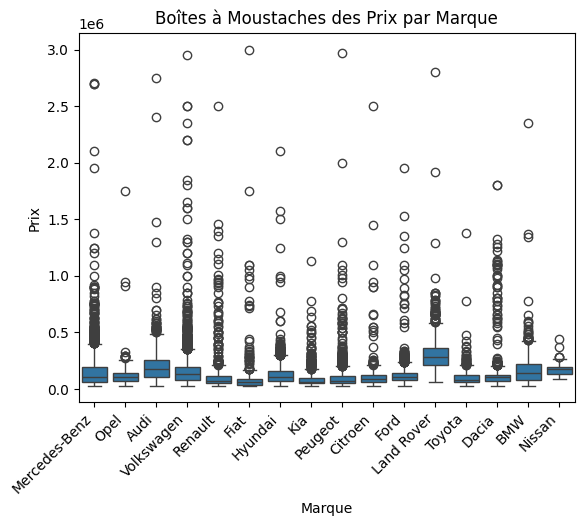

In [ ]:
# Créer des boîtes à moustaches pour chaque marque
sns.boxplot(x='Marque', y='Prix', data=car)
plt.xlabel("Marque")
plt.ylabel("Prix")
plt.xticks(rotation=45, ha="right")
plt.title("Boîtes à Moustaches des Prix par Marque")
plt.show()

In [ ]:
car.to_csv('car.csv')

In [ ]:
# Fonction pour calculer les outliers par modèle
def calculate_outlier_percentage_by_model(df):
    outlier_percentages = {}

    for marque, modele in df.groupby(['Marque', 'Modèle']).groups.keys():
        segment_data = df[(df['Marque'] == marque) & (df['Modèle'] == modele)]['Prix']

        Q1 = segment_data.quantile(0.25)
        Q3 = segment_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = segment_data[(segment_data < lower_bound) | (segment_data > upper_bound)]
        outlier_percentage = (outliers.count() / segment_data.count()) * 100

        outlier_percentages[(marque, modele)] = outlier_percentage

    return outlier_percentages

# Fonction pour calculer les outliers par marque
def calculate_outlier_percentage_by_brand(df):
    outlier_percentages = {}

    for marque in df['Marque'].unique():
        marque_data = df[df['Marque'] == marque]['Prix']

        Q1 = marque_data.quantile(0.25)
        Q3 = marque_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = marque_data[(marque_data < lower_bound) | (marque_data > upper_bound)]
        outlier_percentage = (outliers.count() / marque_data.count()) * 100

        outlier_percentages[marque] = outlier_percentage

    return outlier_percentages

# Calculer le pourcentage des outliers par modèle
outlier_percentages_by_model = calculate_outlier_percentage_by_model(car)

# Calculer le pourcentage des outliers par marque
outlier_percentages_by_brand = calculate_outlier_percentage_by_brand(car)

# Afficher les pourcentages des outliers par modèle
print("Pourcentages des outliers par modèle:")
for (marque, modele), percentage in outlier_percentages_by_model.items():
    print(f"{marque} {modele}: {percentage:.2f}% outliers")

# Afficher les pourcentages des outliers par marque
print("\nPourcentages des outliers par marque:")
for marque, percentage in outlier_percentages_by_brand.items():
    print(f"{marque}: {percentage:.2f}% outliers")

Pourcentages des outliers par modèle:
Audi A3: 1.92% outliers
Audi A4: 2.05% outliers
Audi Q5: 1.43% outliers
BMW Serie 1: 6.31% outliers
BMW Serie 3: 4.64% outliers
BMW Serie 5: 1.51% outliers
Citroen Berlingo: 2.11% outliers
Citroen C3: 0.74% outliers
Citroen C4: 5.29% outliers
Dacia Dokker: 1.63% outliers
Dacia Duster: 0.94% outliers
Dacia Logan: 1.40% outliers
Dacia Sandero: 3.46% outliers
Dacia sandero_stepway: 2.53% outliers
Fiat 500: 3.13% outliers
Fiat Doblo: 3.76% outliers
Fiat FIORINO: 2.94% outliers
Fiat Palio: 3.69% outliers
Fiat Punto: 1.39% outliers
Fiat Siena: 4.25% outliers
Ford Fiesta: 0.67% outliers
Ford Focus: 2.51% outliers
Ford Kuga: 1.68% outliers
Ford Transit: 2.65% outliers
Hyundai Accent: 0.70% outliers
Hyundai Santa Fe: 2.99% outliers
Hyundai Tucson: 0.40% outliers
Hyundai i 10: 6.39% outliers
Hyundai i 30: 4.85% outliers
Hyundai ix 35: 2.50% outliers
Kia Picanto: 17.51% outliers
Kia Sportage: 1.27% outliers
Land Rover Range Rover Evoque: 2.91% outliers
Land R

In [ ]:
car.shape

(38685, 10)

In [ ]:
car.head()

,Marque,Kilométrage,Année-Modèle,Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture,Count
1,Mercedes-Benz,125000,2021.00,Classe A,Diesel,8,Automatique,360000,3,1
2,Mercedes-Benz,155000,2019.00,Classe A,Diesel,6,Automatique,390000,5,1
5,Opel,155000,2013.00,Astra,Diesel,6,Manuelle,112000,11,1
7,Audi,47500,2020.00,A3,Diesel,8,Automatique,275000,4,1
18,Volkswagen,52500,2018.00,Tiguan,Hybride,8,Automatique,250000,6,1


In [ ]:
import pandas as pd
from scipy import stats

def detect_outliers(df, column, groupby_columns):
    """
    Détecte les outliers pour une colonne donnée en fonction de groupes.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        column (str): Le nom de la colonne pour laquelle détecter les outliers.
        groupby_columns (list): La liste des colonnes pour grouper les données.

    Returns:
        pd.DataFrame: Un DataFrame contenant les outliers pour chaque groupe.
    """

    outliers = []

    for group, data in df.groupby(groupby_columns):
        # Calcul de la moyenne et de l'écart type pour le groupe actuel
        mean = data[column].mean()
        std = data[column].std()

        # Détection des valeurs en dehors de 3 écarts types de la moyenne
        z_scores = (data[column] - mean) / std
        outlier_indices = z_scores[abs(z_scores) > 3].index

        # Ajout des outliers à la liste
        for i in outlier_indices:
            outliers.append({'marque': group[0], 'modèle': group[1], 'prix': data.loc[i, column]})

    return pd.DataFrame(outliers)

# Chargement des données (remplacer par votre propre fichier de données)


# Détection des outliers pour le prix en fonction de la marque et du modèle
outliers_df = detect_outliers(car, 'Prix', ['Marque', 'Modèle'])

# Suppression des outliers du DataFrame original
df_cleaned = car.copy()  # Créer une copie du DataFrame
for index in outliers_df.index:
    df_cleaned = df_cleaned[~((df_cleaned['Marque'] == outliers_df.loc[index, 'marque']) &
                               (df_cleaned['Modèle'] == outliers_df.loc[index, 'modèle']) &
                               (df_cleaned['Prix'] == outliers_df.loc[index, 'prix']))]

# Affichage du DataFrame nettoyé
df_cleaned.head()

,Marque,Kilométrage,Année-Modèle,Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture,Count
1,Mercedes-Benz,125000,2021.00,Classe A,Diesel,8,Automatique,360000,3,1
2,Mercedes-Benz,155000,2019.00,Classe A,Diesel,6,Automatique,390000,5,1
5,Opel,155000,2013.00,Astra,Diesel,6,Manuelle,112000,11,1
7,Audi,47500,2020.00,A3,Diesel,8,Automatique,275000,4,1
18,Volkswagen,52500,2018.00,Tiguan,Hybride,8,Automatique,250000,6,1


In [ ]:
df_cleaned.shape

(38321, 10)

In [ ]:
car = df_cleaned

In [ ]:
car.shape

(38321, 10)

In [ ]:
import pandas as pd
from scipy import stats

def detect_outliers(df, column, groupby_columns):
    """
    Détecte les outliers pour une colonne donnée en fonction de groupes.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        column (str): Le nom de la colonne pour laquelle détecter les outliers.
        groupby_columns (list): La liste des colonnes pour grouper les données.

    Returns:
        pd.DataFrame: Un DataFrame contenant les outliers pour chaque groupe.
    """

    outliers = []

    for group, data in df.groupby(groupby_columns):
        # Calcul de la moyenne et de l'écart type pour le groupe actuel
        mean = data[column].mean()
        std = data[column].std()

        # Détection des valeurs en dehors de 3 écarts types de la moyenne
        z_scores = (data[column] - mean) / std
        outlier_indices = z_scores[abs(z_scores) > 3].index

        # Ajout des outliers à la liste
        for i in outlier_indices:
            outliers.append({'marque': group[0], 'modèle': group[1], 'prix': data.loc[i, column]})

    return pd.DataFrame(outliers)

# Chargement des données (remplacer par votre propre fichier de données)


# Détection des outliers pour le prix en fonction de la marque et du modèle
outliers_df = detect_outliers(car, 'Prix', ['Marque', 'Modèle'])

outliers_df.head()

,marque,modèle,prix
0,Audi,A3,620000
1,Audi,A3,650000
2,Audi,A3,550000
3,Audi,A4,410000
4,Audi,A4,400000


In [ ]:
car.shape

(38321, 10)

In [ ]:
car

,Marque,Kilométrage,Année-Modèle,Modèle,Type de carburant,Puissance fiscale,Boite de vitesses,Prix,Age_de_voiture
1,Mercedes-Benz,125000,2021.00,Classe A,Diesel,8,Automatique,360000,3
2,Mercedes-Benz,155000,2019.00,Classe A,Diesel,6,Automatique,390000,5
5,Opel,155000,2013.00,Astra,Diesel,6,Manuelle,112000,11
7,Audi,47500,2020.00,A3,Diesel,8,Automatique,275000,4
18,Volkswagen,52500,2018.00,Tiguan,Hybride,8,Automatique,250000,6
...,...,...,...,...,...,...,...,...,...
82639,Kia,135000,2009.00,Sportage,Diesel,8,Automatique,85000,15
82640,Mercedes-Benz,225000,2010.00,Classe C,Diesel,9,Automatique,132000,14
82646,Volkswagen,225000,2013.00,Caddy,Diesel,6,Manuelle,140000,11
82648,Mercedes-Benz,12500,2001.00,220,Diesel,9,Automatique,50000,23


In [ ]:
car["Puissance fiscale"].describe()

count   38321.00
mean        7.13
std         2.22
min         4.00
25%         6.00
50%         7.00
75%         8.00
max        41.00
Name: Puissance fiscale, dtype: Float64

In [ ]:
car["Kilométrage"].describe()

count    38321.00
mean    142952.94
std      97348.24
min        500.00
25%      67500.00
50%     135000.00
75%     195000.00
max     475000.00
Name: Kilométrage, dtype: Float64

In [ ]:
car.to_csv("car_cleaned.xlsx")

**Les Modeles selon les Prix**

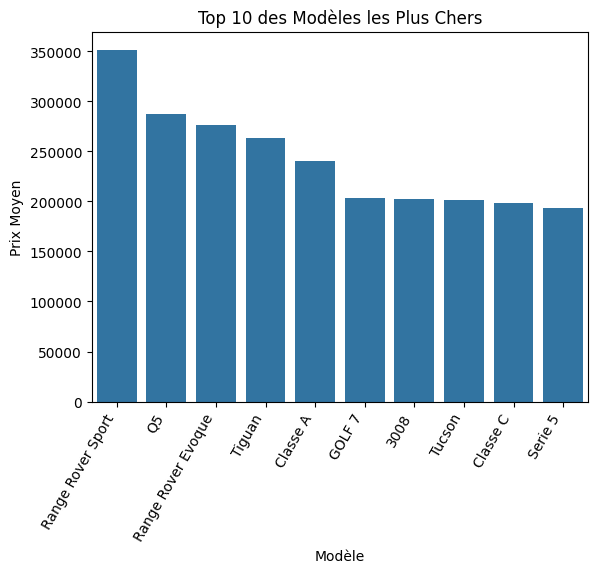

In [ ]:
mean_prices = car.groupby('Modèle')['Prix'].mean()

top10_expensive = mean_prices.sort_values(ascending=False).head(10)

sns.barplot(x=top10_expensive.index, y=top10_expensive.values)
plt.xlabel("Modèle")
plt.ylabel("Prix Moyen")
plt.xticks(rotation=60, ha="right")
plt.title("Top 10 des Modèles les Plus Chers")
plt.show()

**Type de Carburant**

**Prédominance du Diesel :**

  84,16% des véhicules utilisent le diesel comme carburant. Cela indique que le diesel est très populaire, probablement en raison de son efficacité en termes de consommation et de sa réputation pour une meilleure autonomie comparée à l'essence. Cela peut aussi refléter des politiques fiscales favorables, des prix de carburant plus bas, ou une meilleure disponibilité de véhicules diesel dans certains marchés.

  "*Par type de carburant, c’est toujours le diesel qui arrive en tête avec une part de 92,5%, devant l’essence et ses 6,7%. Présent sur quasiment tous les segments, le gazole est ainsi plébiscité par les automobilistes marocains qui y voient une source d’économie à l’usage et surtout, un précieux sésame pour réussir la revente sur le marché du VO.* "

[Source : Association des Importateurs de Vehicule au Maroc](https://www.aivam.ma/fr/marche-automobile-au-maroc#:~:text=Par%20type%20de%20carburant%2C%20c,et%20ses%206%2C7%25.)


  
**Usage Modéré de l'Essence :**

  15.50% des véhicules fonctionnent à l'essence. Bien que moins dominant que le diesel, l'essence reste un choix populaire, probablement en raison de la disponibilité des véhicules et de leur coût initial souvent inférieur à celui des modèles diesel.

**Faible Adoption des Technologies Hybrides et Électriques :**

  Les véhicules hybrides (0.15%) et électriques (0.15%) représentent une fraction très petite du parc automobile. Cela pourrait indiquer un manque d'infrastructures de recharge, des coûts élevés d'achat, ou des incitations fiscales insuffisantes pour encourager l'adoption de véhicules plus écologiques.
  
**Très Faible Usage du LPG :**
  
  Seulement 0.05% des véhicules utilisent le LPG. Le LPG étant souvent considéré comme une alternative moins chère et plus écologique à l'essence et au diesel, sa faible utilisation peut refléter une disponibilité limitée, des problèmes d'infrastructure, ou simplement une préférence du marché pour d'autres types de carburant.

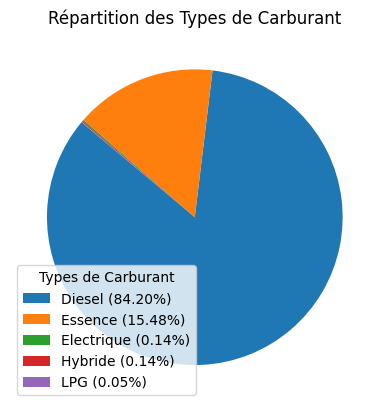

In [ ]:
carburant_counts = car["Type de carburant"].value_counts()

plt.figure()

plt.pie(carburant_counts, startangle=140)

total_count = carburant_counts.sum()
labels = [f"{label} ({(value/total_count)*100:.2f}%)" for label, value in carburant_counts.items()]

plt.title('Répartition des Types de Carburant')
plt.legend(labels, title="Types de Carburant")
plt.show()

**Distribution du Kilometrage des Voitures**

Le graphique montre une concentration notable de véhicules ayant un kilométrage inférieur à 100,000 km. Cela indique que la majorité des voitures dans cet ensemble de données sont relativement peu utilisées ou relativement récentes.



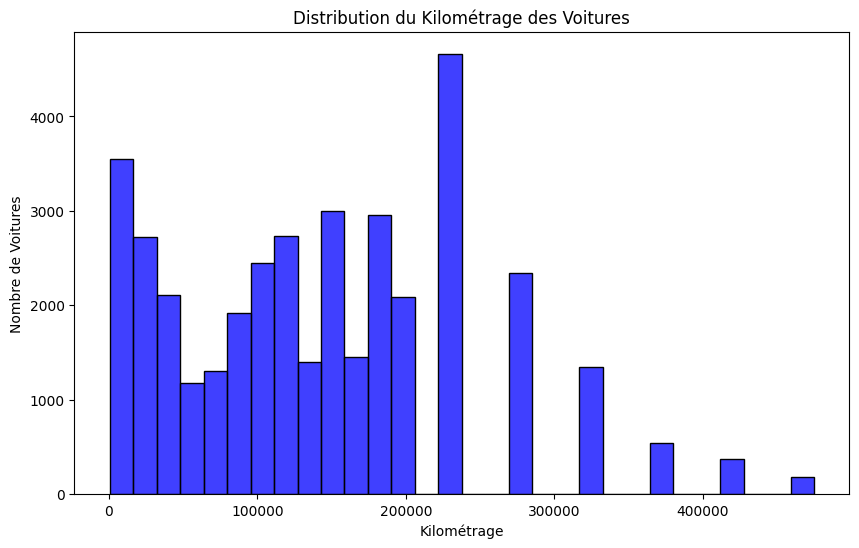

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(car['Kilométrage'], bins=30, kde=False, color='blue')
plt.title('Distribution du Kilométrage des Voitures')
plt.xlabel('Kilométrage')
plt.ylabel('Nombre de Voitures')
plt.show()

**Le graphique suggère que les acheteurs évitent les extrêmes en matière de kilométrage, préférant un juste milieu entre les voitures neuves/peu utilisées et celles à kilométrage élevé.**

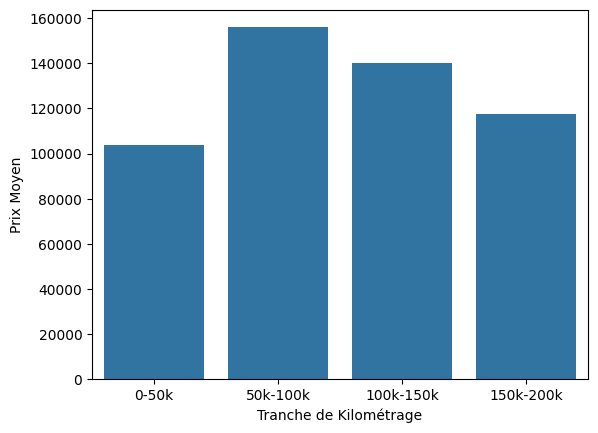

In [ ]:

car['Tranche_km'] = pd.cut(car['Kilométrage'], bins=[0, 50000, 100000, 150000, 200000],
                           labels=['0-50k', '50k-100k', '100k-150k', '150k-200k'])

grouped_data = car.groupby('Tranche_km')['Prix'].mean()

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel("Tranche de Kilométrage")
plt.ylabel("Prix Moyen")
plt.show()

**Le Prix par Rapport au Carburant**


*   **Hybride est la catégorie la plus chère :** Les voitures hybrides ont le prix moyen le plus élevé, dépassant significativement les autres catégories. Cela peut refléter le coût plus élevé de la technologie hybride ou une association avec des modèles haut de gamme.

*   **Diesel et Électrique sont similaires :**Les voitures diesel et électriques ont des prix moyens similaires, légèrement inférieurs aux hybrides.


*  **Essence et LPG sont les moins chers :** Les voitures à essence et à LPG ont les prix moyens les plus bas.

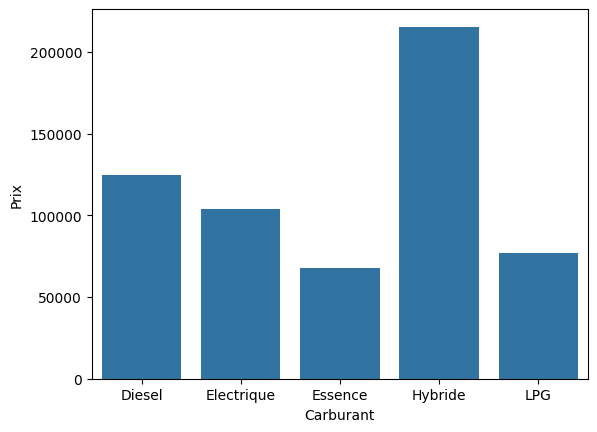

In [ ]:

grouped_data = car.groupby('Type de carburant')['Prix'].mean()

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel("Carburant")
plt.ylabel("Prix")
plt.show()


**Le Prix par Rapport a La Boite a Vitesse**

* **Les voitures automatiques** sont significativement plus chères : Le prix moyen des voitures automatiques est nettement supérieur à celui des voitures manuelles.

* **Différence de prix importante** : L'écart de prix entre les deux types de boîte de vitesses est considérable, ce qui suggère une distinction claire sur le marché.

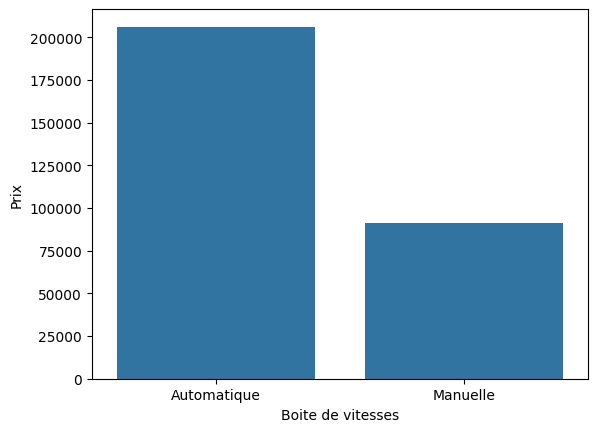

In [ ]:
grouped_data = car.groupby('Boite de vitesses')['Prix'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel("Boite de vitesses")
plt.ylabel("Prix")
plt.show()

**Les Marques Selon Les Prix**

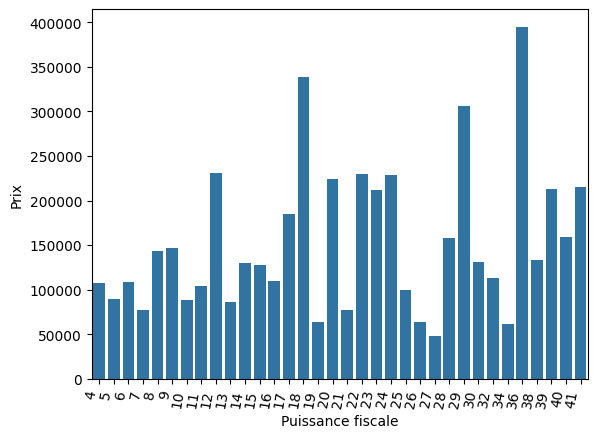

In [ ]:
grouped_data = car.groupby('Puissance fiscale')['Prix'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel("Puissance fiscale")
plt.xticks(rotation=80, ha="right")
plt.ylabel("Prix")
plt.show()

**Visualisation de l'Age de Voiture par Prix**

Le diagramme à barres montre une corrélation négative évidente entre l'âge d'une voiture et son prix.

Cela signifie que plus une voiture est âgée, plus son prix a tendance à diminuer.


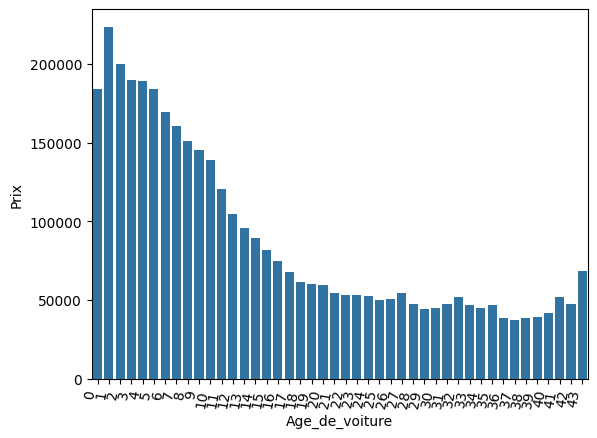

In [ ]:

grouped_data = car.groupby('Age_de_voiture')['Prix'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel("Age_de_voiture")
plt.ylabel("Prix")
plt.xticks(rotation=80, ha="right")
plt.show()

In [ ]:
car.drop("Count",axis=1,inplace=True)
car.drop("Tranche_km",axis=1,inplace=True)

In [ ]:
car.columns

Index(['Marque', 'Kilométrage', 'Année-Modèle', 'Modèle', 'Type de carburant',
       'Puissance fiscale', 'Boite de vitesses', 'Prix', 'Age_de_voiture'],
      dtype='object')

In [ ]:
df = pd.DataFrame(car)
# Encodage one-hot des colonnes 'Marque' et 'Modèle'
df_encoded = pd.get_dummies(car, columns=['Marque','Boite de vitesses','Type de carburant', 'Modèle'], prefix=['Marque', 'Modèle','Boite de vitesses','Type de carburant'])
one_hot_columns = df_encoded.columns[df_encoded.columns.str.startswith(('Marque_', 'Modèle_','Boite de vitesses_','Type de carburant_'))]
df_encoded[one_hot_columns] = df_encoded[one_hot_columns].astype(int)
df_encoded

,Kilométrage,Année-Modèle,Puissance fiscale,Prix,Age_de_voiture,Marque_Audi,Marque_BMW,Marque_Citroen,Marque_Dacia,Marque_Fiat,...,Type de carburant_Touareg,Type de carburant_Touran,Type de carburant_Transit,Type de carburant_Tucson,Type de carburant_Yaris,Type de carburant_i 10,Type de carburant_i 30,Type de carburant_ix 35,Type de carburant_megane_4,Type de carburant_sandero_stepway
1,125000,2021.00,8,360000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,155000,2019.00,6,390000,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,155000,2013.00,6,112000,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,47500,2020.00,8,275000,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,52500,2018.00,8,250000,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82639,135000,2009.00,8,85000,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82640,225000,2010.00,9,132000,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82646,225000,2013.00,6,140000,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82648,12500,2001.00,9,50000,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.to_csv('df_encoded.csv')

In [ ]:
df_encoded["Année-Modèle"] = df_encoded["Année-Modèle"].astype("int64")

In [ ]:
df_encoded.dtypes

Kilométrage                          Int64
Année-Modèle                         int64
Puissance fiscale                    Int64
Prix                                 int64
Age_de_voiture                       Int64
                                     ...  
Type de carburant_i 10               int64
Type de carburant_i 30               int64
Type de carburant_ix 35              int64
Type de carburant_megane_4           int64
Type de carburant_sandero_stepway    int64
Length: 108, dtype: object

In [ ]:
X = df_encoded.drop("Prix",axis=1)
y = df_encoded["Prix"]

#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
lr = LinearRegression()

# Create a pipeline with just the linear regression model
pipe = make_pipeline(lr)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Print the first 10 predicted prices
print("First 10 predicted prices:", y_pred[:10])

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


First 10 predicted prices: [ 95223.1953125 104756.3203125 113620.890625  115216.3671875
  20016.203125  156164.9609375  63588.4296875  49110.8203125
  56763.3203125  88646.390625 ]
R-squared score: 0.7526243637616302


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test

# Create a pipeline with standard scaling and SGD regressor
pipe = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.751624905788303


In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
scores[np.argmax(scores)]

0.7868269334818839

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7868269334818839

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # 100 trees, reproducibility, parallel processing

# Create a pipeline with the RandomForestRegressor model
pipe = make_pipeline(rf)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9096729636424333


# XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
xgb = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # Configure the XGBRegressor

# Create a pipeline with the XGBRegressor model
pipe_XG = make_pipeline(xgb)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred_XG = pipe.predict(X_test)

# Convert predicted prices to integers
y_pred_int_XG = np.round(y_pred_XG).astype(int)

# Print the first 10 predicted integer prices
print("First 10 predicted integer prices:", y_pred_int_XG[:10])

# Calculate the R-squared score using the integer predictions
r2 = r2_score(y_test, y_pred_int_XG)
print("R-squared score with integer predictions:", r2)


First 10 predicted integer prices: [ 97679  76612  98934 113390  48457 118645  46525  34834  63460  77485]
R-squared score with integer predictions: 0.9130074718176697


In [ ]:
!pip install xgboost==1.6.2


In [ ]:
from joblib import dump

# Train the pipeline
pipe_XG.fit(X_train, y_train)

# Save the entire pipeline using joblib
dump(pipe_XG, 'xgboost_pipeline.joblib')


In [ ]:
!pip install xgboost==1.6.2

In [ ]:
import xgboost as xgb
print(xgb.__version__)


2.0.3


In [ ]:

# Charger le modèle depuis le fichier
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Utiliser le modèle chargé pour faire des prédictions
y_pred_loaded = loaded_model.predict(X_test)

# Convertir les prédictions chargées en entiers
y_pred_int_loaded = np.round(y_pred_loaded).astype(int)

# Afficher les prédictions
print("Loaded model predictions:", y_pred_int_loaded[:10])

# Calculer le score R2 pour les prédictions du modèle chargé
r2_loaded = r2_score(y_test, y_pred_int_loaded)
print("R-squared score with loaded model predictions:", r2_loaded)


Loaded model predictions: [ 97679  76612  98934 113390  48457 118645  46525  34834  63460  77485]
R-squared score with loaded model predictions: 0.9130074718176697


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Configure the GradientBoostingRegressor

# Create a pipeline with the GradientBoostingRegressor model
pipe = make_pipeline(gb)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.8826030769168476


# Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
lasso = Lasso(alpha=1.0, random_state=42)  # Configure the Lasso model, alpha is the regularization strength

# Create a pipeline with the Lasso model
pipe = make_pipeline(lasso)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.7868239542488076


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+13, tolerance: 2.239e+10



# Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming you have already imported your dataset and split it into X_train, y_train, X_test, and y_test
ridge = Ridge(alpha=1.0, random_state=42)  # Configure the Ridge model, alpha is the regularization strength

# Create a pipeline with the Ridge model
pipe = make_pipeline(ridge)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.7868237528107463


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already imported your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 2

# Create a pipeline with polynomial features and Ridge regression
pipe = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0, random_state=42))

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = pipe.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score with Polynomial Regression:", r2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.77444e-27): result may not be accurate.



R-squared score with Polynomial Regression: 0.8765246175049616


In [ ]:
import pickle
